In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [29]:
os.listdir('/content/drive/MyDrive/Maskdata_Train')

['without_mask', 'with_mask']

In [30]:
train_path='/content/drive/MyDrive/Maskdata_Train'
x_train=[]
y_train=[]
categories=['without_mask', 'with_mask']
for category in categories:
  sub_dir_path=os.path.join(train_path,category)
  images=os.listdir(sub_dir_path)
  for img in images:
    img_path=os.path.join(sub_dir_path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    x_train.append(img_resized)
    y_train.append(categories.index(category))
  print("Loaded successfully.........",category)

Loaded successfully......... without_mask


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded successfully......... with_mask


In [31]:
os.listdir('/content/drive/MyDrive/Maskdatatest')

['with_mask', 'without_mask']

In [47]:
test_path='/content/drive/MyDrive/Maskdatatest'
x_test=[]
y_test=[]
categories=['without_mask', 'with_mask']
for category in categories:
  sub_dir_path=os.path.join(test_path,category)
  #print(sub_dir_path)
  images=os.listdir(sub_dir_path)
  for img in images:
    img_path=os.path.join(sub_dir_path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    x_test.append(img_resized)
    y_test.append(categories.index(category))
  print("Loaded successfully.........",category)

Loaded successfully......... without_mask
Loaded successfully......... with_mask


In [48]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)

In [49]:
x_train.shape,x_test.shape

((3150, 150, 150, 3), (102, 150, 150, 3))

In [50]:
x_train.ndim

4

In [51]:
x_test.ndim

4

In [52]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [53]:
y_train.shape,y_test.shape

((3150,), (102,))

In [54]:
y_train.ndim,y_test.ndim

(1, 1)

In [55]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax')) # dont give sigmoid

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train,batch_size=12,epochs=10)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8066 - loss: 1.0643
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9420 - loss: 0.1674
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9635 - loss: 0.1023
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9790 - loss: 0.0678
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9853 - loss: 0.0487
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9891 - loss: 0.0336
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9850 - loss: 0.0527
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9958 - loss: 0.0180
Epoch 9/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9888 - loss: 0.0391
Epoch 10/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9960 - loss: 0.0154


In [58]:
Loss,Accuracy = model.evaluate(x_test,y_test)
print("Loss = ",Loss)
print("Accuracy = ",Accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9546 - loss: 0.1486
Loss =  0.26940757036209106
Accuracy =  0.9411764740943909


In [69]:
def predict_new(img,model):
  img1=resize(img,(150,150,3))
  img1=img1.reshape(1,150,150,3)
  pred=model.predict(img1)
  ind=pred.argmax()
  print("Predicted class = ",categories[ind])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 255],
        [255, 253, 254],
        [255, 253, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 255],
        [255, 253, 254],
        [255, 253, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 255],
        [255, 253, 255],
        [255, 253, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
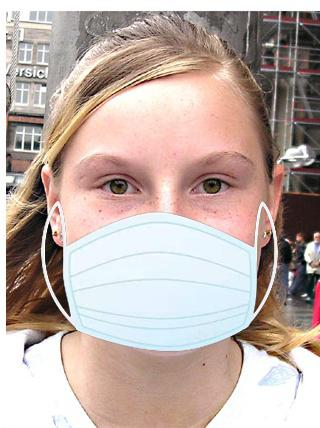

In [73]:
img=imread('/content/drive/MyDrive/Maskdatatest/with_mask/100-with-mask.jpg')
img

In [74]:
predict_new(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class =  with_mask


array([[[ 0,  4,  0],
        [ 0,  4,  0],
        [ 0,  5,  0],
        ...,
        [ 2, 12,  4],
        [ 3, 13,  5],
        [ 3, 13,  5]],

       [[ 0,  4,  0],
        [ 0,  5,  0],
        [ 1,  6,  0],
        ...,
        [ 2, 12,  4],
        [ 2, 12,  4],
        [ 2, 12,  4]],

       [[ 0,  5,  0],
        [ 0,  5,  0],
        [ 2,  7,  0],
        ...,
        [ 2, 12,  4],
        [ 0, 10,  2],
        [ 0, 10,  2]],

       ...,

       [[50, 32,  8],
        [50, 32,  8],
        [50, 32,  8],
        ...,
        [32, 19,  3],
        [30, 16,  3],
        [30, 16,  3]],

       [[50, 32,  8],
        [50, 32,  8],
        [50, 32,  8],
        ...,
        [32, 19,  3],
        [30, 16,  3],
        [30, 16,  3]],

       [[50, 32,  8],
        [50, 32,  8],
        [50, 32,  8],
        ...,
        [31, 18,  2],
        [29, 15,  2],
        [29, 15,  2]]], dtype=uint8)
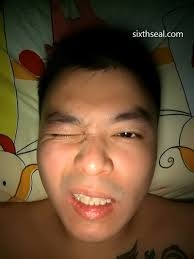

In [75]:
img1=imread('/content/drive/MyDrive/Maskdatatest/without_mask/34.jpg')
img1

In [76]:
predict_new(img1,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class =  without_mask
